In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


In [6]:
df = pd.read_csv("/content/gcar_data.csv")
df.head()



,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,75721,ford,Ford Kuga,black,05/2023,2023,38490,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0,ST-Line Hybrid Adapt.LED+Head-Up-Display Klima
1,80184,hyundai,Hyundai i10,black,09/2018,2018,11555,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0,"blue Trend,Viele Extras,Top-Zustand"
2,19864,audi,Audi Q4 e-tron,grey,05/2021,2021,48886,125,170,Automatic,Electric,NaN,0 g/km,4247.0,35 e-tron S line/Matrix/Pano/ACC/SONOS/LM 21
3,76699,honda,Honda CR-V,red,07/2018,2018,24490,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0,2.0 Lifestyle Plus Automatik Navi FAP
4,92991,kia,Kia Sportage,black,02/2023,2023,34990,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0,"1.6 T 48V 2WD Spirit LED, WR"


In [4]:
print("Dataset Shape:", df.shape)
df.info()
df.describe()


Dataset Shape: (100000, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                100000 non-null  int64  
 1   brand                     100000 non-null  object 
 2   model                     100000 non-null  object 
 3   color                     99924 non-null   object 
 4   registration_date         99999 non-null   object 
 5   year                      100000 non-null  object 
 6   price_in_euro             100000 non-null  object 
 7   power_kw                  99925 non-null   object 
 8   power_ps                  99928 non-null   object 
 9   transmission_type         100000 non-null  object 
 10  fuel_type                 100000 non-null  object 
 11  fuel_consumption_l_100km  88761 non-null   object 
 12  fuel_consumption_g_km     100000 non-null  object 
 13  mileage_in_km    

,Unnamed: 0,mileage_in_km
count,100000.000000,9.993200e+04
mean,49999.500000,8.559891e+04
std,28867.657797,7.929713e+04
min,0.000000,0.000000e+00
25%,24999.750000,2.550000e+04
50%,49999.500000,6.800000e+04
75%,74999.250000,1.270000e+05
max,99999.000000,3.800000e+06


In [5]:
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])


In [6]:
# fuel_consumption_l_100km
df['fuel_consumption_l_100km'] = (
    df['fuel_consumption_l_100km']
    .str.replace(' l/100 km', '')
    .str.replace(',', '.')
)
df['fuel_consumption_l_100km'] = pd.to_numeric(df['fuel_consumption_l_100km'], errors='coerce')

# fuel_consumption_g_km
df['fuel_consumption_g_km'] = (
    df['fuel_consumption_g_km']
    .str.replace(' g/km', '')
)
df['fuel_consumption_g_km'] = pd.to_numeric(df['fuel_consumption_g_km'], errors='coerce')


In [7]:
df = df.drop(columns=['offer_description'])


In [8]:
cat_cols = ['brand','model','color','transmission_type','fuel_type']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [ ]:
X = df.drop(columns=['price_in_euro'])
y = df['price_in_euro']



In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: name 'train_test_split' is not defined

In [11]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


KeyboardInterrupt: 

In [12]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


NameError: name 'y_pred' is not defined

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make a copy
df_encoded = df.copy()

# Encode all object columns
le = LabelEncoder()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()


In [10]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=80,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)




RandomForestRegressor(max_depth=20, n_estimators=80, n_jobs=-1, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=80,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, n_estimators=80, n_jobs=-1, random_state=42)

In [15]:
y_pred = rf.predict(X_test)


In [16]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 0.5760396016146071
MAE: 1277.0962625796699
RMSE: 2160.6004734950047


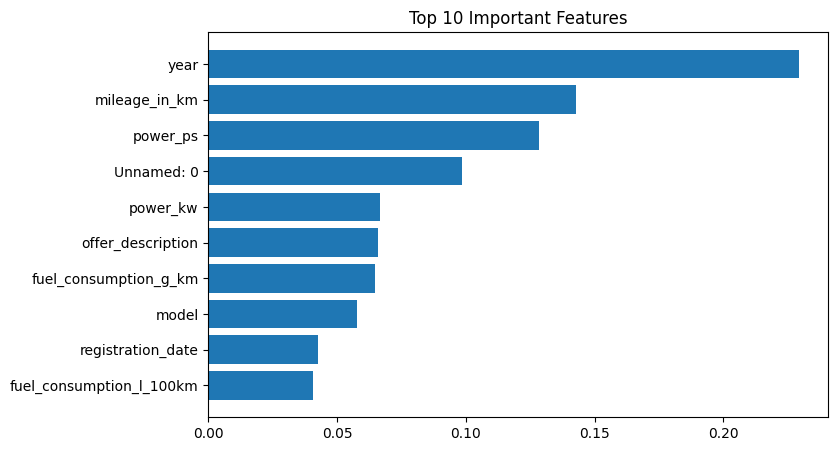

In [17]:
import numpy as np
import matplotlib.pyplot as plt

importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features

plt.figure(figsize=(8,5))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title("Top 10 Important Features")
plt.show()


In [19]:
df_encoded.columns



Index(['mileage_in_km', 'brand_aston-martin', 'brand_audi', 'brand_bentley',
       'brand_bmw', 'brand_cadillac', 'brand_chevrolet', 'brand_chrysler',
       'brand_citroen', 'brand_dacia',
       ...
       'offer_description_ë-Berlingo M Elektromotor 136 SHINE',
       'offer_description_ë-Berlingo M Elektromotor 136 SHINE (NEU 2018)',
       'offer_description_ë-C4 Elektromotor 136 SHINE',
       'offer_description_ë-C4 Elektromotor 136 Shine',
       'offer_description_ë-C4 X Elektromotor Shine 136',
       'offer_description_Є61',
       'offer_description_♥️Avant 3.0 TDI V6 QUATTRO AHK ♥️',
       'offer_description_⭐️ Ambiente (CCU), 3 Hand ⭐️',
       'offer_description_⭐️ i Touring (E46), Klimaautomatik, PDC ⭐️',
       'offer_description_⭐️i Touring e46 Klimaautomatik PDC, 3 Hd⭐️'],
      dtype='object', length=94837)

In [22]:
# define target
y = df["price_in_euro"]

# define features
X = df.drop("price_in_euro", axis=1)

X.head(), y.head()




(     brand           model  color registration_date  year power_kw power_ps  \
 0     ford       Ford Kuga  black           05/2023  2023      140      190   
 1  hyundai     Hyundai i10  black           09/2018  2018       49       67   
 2     audi  Audi Q4 e-tron   grey           05/2021  2021      125      170   
 3    honda      Honda CR-V    red           07/2018  2018      114      155   
 4      kia    Kia Sportage  black           02/2023  2023      110      150   
 
   transmission_type fuel_type fuel_consumption_l_100km fuel_consumption_g_km  \
 0         Automatic    Hybrid             5,4 l/100 km              124 g/km   
 1            Manual    Petrol             4,6 l/100 km              106 g/km   
 2         Automatic  Electric                      NaN                0 g/km   
 3         Automatic    Petrol             7,5 l/100 km              175 g/km   
 4            Manual    Petrol             5,9 l/100 km              150 g/km   
 
    mileage_in_km             

In [25]:
df[~df["price_in_euro"].str.replace(",", "").str.isnumeric()]


,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
4733,mazda,Mazda CX-5,grey,14950,Manual,AHK,2016,122 g/km,Manual,160.629 km,Diesel,06/2016,NaN
10647,citroen,Citroen C2,grey,Automatic,Petrol,62.000km,"5,9 l/100 km",54,Automatic,04/2008,- (g/km),2008,3000.0
10726,bmw,BMW X3,grey,Automatic,Petrol,AC-Schnitzer 360 PS,"8,3 l/100 km",265,Automatic,01/2016,193 g/km,2016,33490.0
21199,fiat,Fiat Tipo,orange,Automatic,Petrol,Style,"5,1 l/100 km",96,Automatic,10/2022,117 g/km,2022,25990.0
21373,ford,Ford Mondeo,red,Manual,Diesel,LED+AHVK+Na,"4,5 l/100 km",132,Manual,12/2014,117 g/km,2014,7500.0
21377,ford,Ford Focus,silver,Manual,Petrol,Klima! TÜV neu!,"7,6 l/100 km",85,Manual,06/2004,181 g/km,2004,2300.0
21560,audi,Audi A4,grey,122.000 km,04/2017,Matrix,129 g/km,"4,9 l/100 km",Automatic,Automatic,2017,Diesel,NaN
22131,bmw,BMW 635,black,20200,Automatic,leder,2009,- (g/km),Automatic,108.313 km,Diesel,02/2009,NaN
22964,audi,Audi A4,silver,8449,Automatic,Automatik,2005,194 g/km,Automatic,74.194 km,Petrol,11/2005,NaN
24484,bmw,BMW Z4,black,Manual,Petrol,Remus Sport,"7,5 l/100 km",110,Manual,05/2009,- (g/km),2009,17500.0


In [26]:
df = df[df["price_in_euro"].str.replace(",", "").str.isnumeric()]


In [27]:
df["price_in_euro"] = df["price_in_euro"].str.replace(",", "").astype(float)


In [29]:
df["price_in_euro"] = df["price_in_euro"].astype(str)

# Keep only numeric entries
df = df[df["price_in_euro"].str.replace(",", "").str.isnumeric()]

# Convert to float
df["price_in_euro"] = df["price_in_euro"].str.replace(",", "").astype(float)

df.head()


,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km


In [30]:
numeric_cols = ["power_kw", "power_ps", "mileage_in_km", "fuel_consumption_l_100km"]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(",", ""), errors="coerce")

df = df.dropna(subset=numeric_cols)


In [32]:
df.columns


Index(['brand', 'model', 'color', 'registration_date', 'year', 'price_in_euro',
       'power_kw', 'power_ps', 'transmission_type', 'fuel_type',
       'fuel_consumption_l_100km', 'fuel_consumption_g_km', 'mileage_in_km'],
      dtype='object')

In [33]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ["brand", "model", "color", "transmission_type", "fuel_type"]

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))


In [34]:
df["registration_date"] = pd.to_datetime(df["registration_date"], format="%m/%Y", errors="coerce")
df["reg_year"] = df["registration_date"].dt.year
df["reg_month"] = df["registration_date"].dt.month
df = df.drop("registration_date", axis=1)


In [36]:
df["fuel_consumption_l_100km"] = (
    df["fuel_consumption_l_100km"]
    .astype(str)
    .str.replace(",", ".")
    .str.extract(r"(\d+\.\d+|\d+)")
)

df["fuel_consumption_g_km"] = (
    df["fuel_consumption_g_km"]
    .astype(str)
    .str.extract(r"(\d+)")
)

df["fuel_consumption_l_100km"] = df["fuel_consumption_l_100km"].astype(float)
df["fuel_consumption_g_km"] = df["fuel_consumption_g_km"].astype(float)


In [37]:
y = df["price_in_euro"]
X = df.drop("price_in_euro", axis=1)


In [38]:
numeric_cols = ["year", "power_kw", "power_ps", "mileage_in_km",
                "fuel_consumption_l_100km", "fuel_consumption_g_km"]

categorical_cols = ["brand", "model", "color", "registration_date",
                    "transmission_type", "fuel_type"]


In [40]:
df.columns



Index(['brand', 'model', 'color', 'year', 'price_in_euro', 'power_kw',
       'power_ps', 'transmission_type', 'fuel_type',
       'fuel_consumption_l_100km', 'fuel_consumption_g_km', 'mileage_in_km',
       'reg_year', 'reg_month'],
      dtype='object')

In [45]:
from google.colab import files
uploaded = files.upload()


Saving gcar_data.csv to gcar_data (1).csv


In [46]:
import pandas as pd

df = pd.read_csv("gcar_data.csv")
print(df.shape)
print(df.head())
print(df.columns.tolist())


(100000, 15)
   Unnamed: 0    brand           model  color registration_date  year  \
0       75721     ford       Ford Kuga  black           05/2023  2023   
1       80184  hyundai     Hyundai i10  black           09/2018  2018   
2       19864     audi  Audi Q4 e-tron   grey           05/2021  2021   
3       76699    honda      Honda CR-V    red           07/2018  2018   
4       92991      kia    Kia Sportage  black           02/2023  2023   

  price_in_euro power_kw power_ps transmission_type fuel_type  \
0         38490      140      190         Automatic    Hybrid   
1         11555       49       67            Manual    Petrol   
2         48886      125      170         Automatic  Electric   
3         24490      114      155         Automatic    Petrol   
4         34990      110      150            Manual    Petrol   

  fuel_consumption_l_100km fuel_consumption_g_km  mileage_in_km  \
0             5,4 l/100 km              124 g/km          100.0   
1             4,6 l/100

In [47]:
df.shape
df.columns.tolist()


['Unnamed: 0',
 'brand',
 'model',
 'color',
 'registration_date',
 'year',
 'price_in_euro',
 'power_kw',
 'power_ps',
 'transmission_type',
 'fuel_type',
 'fuel_consumption_l_100km',
 'fuel_consumption_g_km',
 'mileage_in_km',
 'offer_description']

In [50]:
# Convert numeric columns safely
num_cols = ['year','power_kw','power_ps','fuel_consumption_l_100km',
            'fuel_consumption_g_km','mileage_in_km']

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows where numeric conversion failed
df = df.dropna(subset=num_cols)

df.shape


(78581, 15)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Select features and target
X = df[['brand','model','color','year','power_kw','power_ps','transmission_type',
        'fuel_type','fuel_consumption_l_100km','fuel_consumption_g_km','mileage_in_km']]

y = df['price_in_euro']

# Categorical & numeric columns
cat_cols = ['brand','model','color','transmission_type','fuel_type']
num_cols = ['year','power_kw','power_ps','fuel_consumption_l_100km',
            'fuel_consumption_g_km','mileage_in_km']

# Preprocessing
ct = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)
], remainder='passthrough')

X_transformed = ct.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# Predictions
pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

mae, r2


(3667.147508616131, 0.8997237277341402)

In [53]:
!lscpu


Architecture:                x86_64
  CPU op-mode(s):            32-bit, 64-bit
  Address sizes:             46 bits physical, 48 bits virtual
  Byte Order:                Little Endian
CPU(s):                      2
  On-line CPU(s) list:       0,1
Vendor ID:                   GenuineIntel
  Model name:                Intel(R) Xeon(R) CPU @ 2.00GHz
    CPU family:              6
    Model:                   85
    Thread(s) per core:      2
    Core(s) per socket:      1
    Socket(s):               1
    Stepping:                3
    BogoMIPS:                4000.30
    Flags:                   fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pg
                             e mca cmov pat pse36 clflush mmx fxsr sse sse2 ss h
                             t syscall nx pdpe1gb rdtscp lm constant_tsc rep_goo
                             d nopl xtopology nonstop_tsc cpuid tsc_known_freq p
                             ni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2ap
                   